<a href="https://colab.research.google.com/github/Rishit605/drug-classification/blob/main/QSAR_Web_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR Model Building of Acetylcholinesterase Inhibitors**

## Reading the Data

In [1]:
import pandas as pd

In [2]:
dat = '/content/dataset/4bioactivity_class_pIC50__4data_pubchem_fp.csv'
df = pd.read_csv(dat)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.974694
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.995679
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.939302
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.970616


In [6]:
X = df.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = df.iloc[:, -1]
y

0      5.142668
1      5.026872
2      4.869666
3      4.882397
4      5.698970
         ...   
128    4.974694
129    4.995679
130    4.939302
131    4.970616
132    4.102923
Name: pIC50, Length: 133, dtype: float64

In [10]:
from sklearn. feature_selection import VarianceThreshold

def remove_low_var(input_data, threshold=0.1):
  selection = VarianceThreshold(threshold)
  selection.fit(input_data)
  return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_var(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP34,...,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP792,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,0,0,1,1,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,1,1,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
129,1,1,0,0,0,1,1,0,0,0,...,1,0,1,0,0,1,1,1,1,0
130,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
131,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0


In [11]:
X.to_csv('discriptor_list.csv', index = False)

# **Using Decision Tree Model**

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
model = DecisionTreeRegressor(max_leaf_nodes=5000)
model.fit(X, y)
r2 = model.score(X, y)
r2

0.6374955926723727

# Model Prediction

In [27]:
y_pred = model.predict(X)
y_pred

array([5.1426675 , 5.02687215, 4.86966623, 5.17786861, 5.69897   ,
       6.00877392, 5.31695296, 5.17786861, 4.95078198, 5.17786861,
       4.90066472, 4.75696195, 4.34678749, 4.15490196, 4.18045606,
       6.43179828, 4.90308999, 4.43499403, 4.60205999, 4.43499403,
       5.95860731, 4.30103   , 3.26143937, 3.26143937, 2.26143937,
       2.26143937, 2.30103   , 2.30103   , 2.349485  , 2.349485  ,
       2.5       , 2.5       , 2.61092437, 2.61092437, 2.67339374,
       2.67339374, 2.69897   , 2.69897   , 2.91195437, 2.91195437,
       2.91195437, 2.91195437, 2.96040938, 2.96040938, 2.        ,
       2.        , 2.150515  , 2.150515  , 2.19897   , 2.19897   ,
       2.22796598, 2.22796598, 2.26143937, 2.26143937, 2.26143937,
       2.26143937, 2.349485  , 2.349485  , 2.349485  , 2.349485  ,
       2.349485  , 2.349485  , 2.349485  , 2.349485  , 2.61092437,
       2.61092437, 2.69897   , 2.69897   , 2.76143937, 2.76143937,
       2.91195437, 2.91195437, 2.92693598, 2.92693598, 2.97930

# Model Performance

In [29]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, y_pred))

Mean squared error (MSE): 1.14
Coefficient of determination (R^2): 0.64


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [30]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Predicted pIC50')

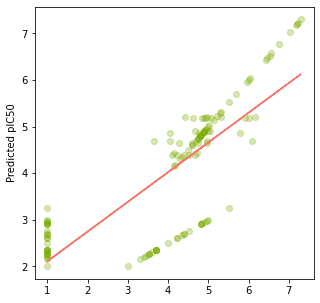

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(x=y, y=y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)

plt.plot(y,p(y),"#F8766D")
plt.ylabel('Predicted pIC50')

# Save Model as Pickle Object

In [33]:
import pickle
pickle.dump(model, open('coronavirus_model.pkl', 'wb'))